# MATH123-HW6
Ethan Harvey

In [191]:
import numpy as np
import pandas as pd

import cvxopt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Question 1
(a)

$f(x) = (Ax-b)W^{T}W(Ax-b) = A^{T}x^{T}W^{T}WAx-2A^{T}x^{T}W^{T}Wb+b^{T}W^{T}Wb$

Setting the gradient equal to $0$

$\nabla_{x}f(x) = 2A^{T}W^{T}WAx-2A^{T}W^{T}Wb = 0$

$2A^{T}W^{T}WAx = 2A^{T}W^{T}Wb$

Dividing by $2$ we get

$A^{T}W^{T}WAx = A^{T}W^{T}Wb$

(b)

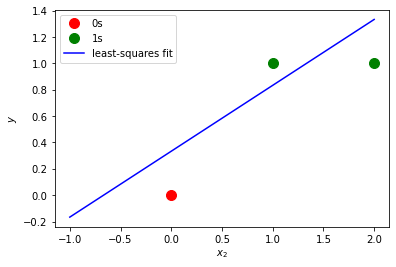

In [221]:
A = np.array([[1,0],[1,1],[1,2]])
b = np.array([[0],[1],[1]])
W = np.array([[1,0,0],[0,2,0],[0,0,1]])
parameters = np.linalg.inv(A.T@W.T@W@A)@A.T@W.T@W@b
# calculate slope and axis
m = parameters[1][0]
c = parameters[0][0]
x = A[:,1]
y = b[:,0]
# plot 
plt.plot(x[0], y[0], "ro", label="0s", markersize=10)
plt.plot(x[1:len(x)], y[1:len(y)], "go", label="1s", markersize=10)
plt.plot(np.array([-1,0,1,2]), m*np.array([-1,0,1,2])+c, "-b", label="least-squares fit")
plt.legend()
plt.xlabel("$x_{2}$")
plt.ylabel("$y$")
plt.show()

### Question 2

(a) As $C$ approaches infinity, having any non-zero slack variable would have infinite penalty and so all slack variables are set to 0 (we have a hard-margin SVM).

(b) For very small $C$, our margin is large (we have a soft-margin SVM). This means the road that divides our data is wide. It is easy for a model with a soft-margin to underfit the training data.

(c) For very large $C$, our margin is small (we have a hard-margin SVM). This means the road that divides our data is narrow. It is easy for a model with a hard-margin to overfit the training data.

### Question 3

(a)

#### Define Lagrangian

$L(w,b,a) = \frac{1}{2}w^{T}w - \sum_{i=1}^{n}a_{i}(y_{i}(w^{T}x_{i}+b)-1)$

#### Calculate partial derivatives of Lagrangian

$\frac{\partial L}{\partial w} = w - \sum_{i=1}^{n}a_{i}y_{i}x_{i} = 0$

$w = \sum_{i=1}^{n}a_{i}y_{i}x_{i}$

$\frac{\partial L}{\partial b} = \sum_{i=1}^{n}a_{i}y_{i} = 0$

#### Define the dual problem for SVM

$\begin{align*}
& \underset{a}{\text{maximize}}& & \sum_{i=1}^{n}a_{i} - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}a_{i}a_{j}y_{i}y_{j}(x_{i}\cdot x_{j}) \\
& \text{subject to}& & a_{i} = 0, i=1,\ldots, n \\
& & & \sum_{i=1}^{n}a_{i}y_{i} = 0
\end{align*}$

#### Solve dual problem to find Lagrange multipliers

The dual problem can be reformulated into the following quadratic programming problem

$\begin{align*}
& \underset{a}{\text{minimize}}
& & \tilde{L}(a) = \frac{1}{2} a^{T} YKYa - {1}^{T}a \\
& \text{subject to}
& & G a \preceq h \\
& & & y^Ta = 0
\end{align*}$

where $a \in\mathbb{R}^{N\times 1}$ has entries $a_i$, $Y\in\mathbb{R}^{N\times N}$ is the diagonal matrix where $Y_{ii} = y_i$, ${1}\in\mathbb{R}^{N\times 1}$ is the vector whose entries are all 1's, $G$ is an $N\times N$ identity matrix ontop of $-1$ times an $N\times N$ identity matrix, and $h \in\mathbb{R}^{2N}$ is the vector whose first $N$ entries are $C$ and the second $N$ enties are $0$.


In [227]:
C = 1
X_train = np.array([[0,0],[2,2],[2,0],[3,0]])
y_train = np.array([[-1],[-1],[1],[1]])
n_samples, n_features = X_train.shape
y_train = np.reshape(y_train, n_samples)

K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i,j] = X_train[i].T@X_train[j]

P = cvxopt.matrix(np.diag(y_train)@K@np.diag(y_train))
q = cvxopt.matrix(np.ones(n_samples) * -1)
A = cvxopt.matrix(y_train.astype('float'), (1, n_samples))
b = cvxopt.matrix(0.0)
G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))

# use cvxopt to solve dual problem to find Lagrange multipliers
cvxopt.solvers.options['show_progress'] = False
solution = cvxopt.solvers.qp(P, q, G, h, A, b)
a = np.ravel(solution['x'])

# substitute into dual problem to find weights
w = np.zeros(X_train.shape[1])
for i in range(len(a)):
    if a[i] > 1e-8:
        w += (a[i] * y_train[i] * X_train[i])
        
# substitute into a support vector to find bias
b = -0.5*(max(np.inner(w, X_train[y_train==-1]))+min(np.inner(w, X_train[y_train==1])))

print("a =", a)
print("w =", w)
print("b =", b)

a = [4.99681149e-01 4.99681154e-01 9.99362294e-01 9.72403053e-09]
w = [ 0.99936228 -0.99936231]
b = -0.9993622794586009


(b) Based your solution in (a), find an explicit form for the classifier function.

In [228]:
def classify(X, w, b):
    return np.where(X@w + b >= 0, 1.0, -1.0)

(c)

In [229]:
X_test = np.array([[6,2],[1,1]])
print(classify(X_test, w, b))

[ 1. -1.]


(d) Compute the geometric margin.

(e) What are the equations of the support vectors?

### Question 4

In [176]:
data = pd.read_csv("data/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [180]:
X = data.drop(columns=["output"])
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
try_params = {
    "C": np.logspace(-5, 5, base=10, num=100),
    "penalty": ["l1","l2"]
}
clf = LogisticRegression()
gscv = GridSearchCV(clf, try_params, cv=5, n_jobs=-1)
gscv.fit(X_train, y_train)
print("Best parameters found:\n", gscv.best_params_)

Best parameters found:
 {'C': 0.013530477745798061, 'penalty': 'l2'}


In [181]:
print(f"Train accuracy: {gscv.score(X_train, y_train)*100:.2f}%")
print(f" Test accuracy: {gscv.score(X_test, y_test)*100:.2f}%")

Train accuracy: 82.55%
 Test accuracy: 81.32%


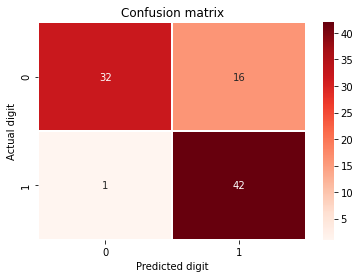

In [182]:
sns.heatmap(confusion_matrix(y_test, gscv.predict(X_test)), annot=True, linewidths=0.5, cmap='Reds')
plt.ylabel('Actual digit')
plt.xlabel('Predicted digit')
plt.title('Confusion matrix')
plt.show()

I chose to predict the `output` column (0 = less chance of heart attack, 1 = more chance of heart attack). After splitting the data into a train and test set, I used `GridSearchCV` to find the best inverse regularization strength and penalty. `GridSearchCV` uses cross validation to find the best specified hyperparameters. I assesed the validity of my model using accuracy and a confusion matrix. Accuracy shows the number of data points my model predicted correctly but the confusion matrix shows the number of false negatives and false positives my model predicted (which I can use to calculate percision and recall).